<a href="https://colab.research.google.com/github/LizandraAbelha/IAdatascience/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [130]:
import pandas as pd
import numpy as np
import requests

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(url)
dados_json = response.json()

df = pd.DataFrame(dados_json)

print("Formato inicial do df:", df.shape)
print(df.head())



Formato inicial do df: (7267, 6)
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber

In [131]:
df_expanded = pd.concat([
    df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    df['customer'].apply(pd.Series),
    df['phone'].apply(pd.Series),
    df['internet'].apply(pd.Series),
    df['account'].apply(pd.Series)
], axis=1)

print("Formato após expansão:", df_expanded.shape)
print(df_expanded.head())


Formato após expansão: (7267, 20)
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
0          Yes            No             DSL             No          Yes   
1          Yes           Yes             DSL             No           No   
2          Yes            No     Fiber optic             No           No   
3          Yes            No     Fiber optic             No          Yes   
4          Yes            No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Cont

#🔧 Transformação

In [132]:
print(df_expanded.dtypes)

customerID          object
Churn               object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Charges             object
dtype: object


In [133]:
print(df_expanded.describe(include='all'))

        customerID Churn gender  SeniorCitizen Partner Dependents  \
count         7267  7267   7267    7267.000000    7267       7267   
unique        7267     3      2            NaN       2          2   
top     9995-HOTOH    No   Male            NaN      No         No   
freq             1  5174   3675            NaN    3749       5086   
mean           NaN   NaN    NaN       0.162653     NaN        NaN   
std            NaN   NaN    NaN       0.369074     NaN        NaN   
min            NaN   NaN    NaN       0.000000     NaN        NaN   
25%            NaN   NaN    NaN       0.000000     NaN        NaN   
50%            NaN   NaN    NaN       0.000000     NaN        NaN   
75%            NaN   NaN    NaN       0.000000     NaN        NaN   
max            NaN   NaN    NaN       1.000000     NaN        NaN   

             tenure PhoneService MultipleLines InternetService OnlineSecurity  \
count   7267.000000         7267          7267            7267           7267   
unique   

In [134]:
for col in df_expanded.columns:
    print(f"\nColuna: {col}")
    print(df_expanded[col].value_counts(dropna=False).head(10))


Coluna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
9967-ATRFS    1
9966-VYRTZ    1
9965-YOKZB    1
9964-WBQDJ    1
9962-BFPDU    1
Name: count, dtype: int64

Coluna: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Coluna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

Coluna: SeniorCitizen
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

Coluna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Coluna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Coluna: tenure
tenure
1     634
72    369
2     246
3     207
4     185
71    176
5     138
7     136
8     130
9     125
Name: count, dtype: int64

Coluna: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Coluna: MultipleLines
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Coluna: I

In [135]:
def extrair_total(charges):
    if isinstance(charges, dict) and 'Total' in charges:
        try:
            return float(charges['Total'])
        except:
            return np.nan
    else:
        return np.nan

df_expanded['Charges_Total'] = df_expanded['Charges'].apply(extrair_total)

print(df_expanded[['Charges', 'Charges_Total']].head())


                                 Charges  Charges_Total
0    {'Monthly': 65.6, 'Total': '593.3'}         593.30
1    {'Monthly': 59.9, 'Total': '542.4'}         542.40
2   {'Monthly': 73.9, 'Total': '280.85'}         280.85
3  {'Monthly': 98.0, 'Total': '1237.85'}        1237.85
4    {'Monthly': 83.9, 'Total': '267.4'}         267.40


In [136]:
df_expanded['tenure'] = pd.to_numeric(df_expanded['tenure'], errors='coerce')

In [137]:
df_expanded = df_expanded.dropna(subset=['Charges_Total'])

In [138]:
for col in df_expanded.columns:
    if df_expanded[col].apply(lambda x: isinstance(x, dict)).any():
        print(f"Coluna com dicts: {col}")

Coluna com dicts: Charges


In [139]:
df_expanded['Charges'] = df_expanded['Charges'].apply(lambda x: float(x['Total']) if isinstance(x, dict) and 'Total' in x else np.nan)


<ipython-input-139-509304667>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expanded['Charges'] = df_expanded['Charges'].apply(lambda x: float(x['Total']) if isinstance(x, dict) and 'Total' in x else np.nan)


In [140]:
df_expanded = df_expanded.dropna(subset=['Charges'])

In [141]:
df_expanded = df_expanded.reset_index(drop=True)

In [142]:
df_expanded = df_expanded.drop_duplicates()

In [143]:
print("Formato após limpeza:", df_expanded.shape)


Formato após limpeza: (7256, 21)


In [144]:
print(df_expanded.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [145]:
df_expanded['Charges'] = df_expanded['Charges_Total']
df_expanded = df_expanded.drop(columns=['Charges_Total'])

print(df_expanded[['Charges', 'tenure']].head())



   Charges  tenure
0   593.30       9
1   542.40       9
2   280.85       4
3  1237.85      13
4   267.40       3


In [146]:
df_expanded['Contas_Diarias'] = df_expanded['Charges'] / 30

print(df_expanded[['Charges', 'Contas_Diarias']].head())


   Charges  Contas_Diarias
0   593.30       19.776667
1   542.40       18.080000
2   280.85        9.361667
3  1237.85       41.261667
4   267.40        8.913333


In [147]:
df_expanded['Churn'] = df_expanded['Churn'].map({'Yes':1, 'No':0, 'Sim':1, 'Não':0})

print(df_expanded['Churn'].value_counts())

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64


#📊 Carga e análise

In [148]:
df_expanded.describe()

,Churn,SeniorCitizen,tenure,Charges,Contas_Diarias
count,7032.000000,7256.0000,7256.000000,7256.000000,7256.000000
mean,0.265785,0.1629,32.395535,2280.634213,76.021140
std,0.441782,0.3693,24.558067,2268.632997,75.621100
min,0.000000,0.0000,1.000000,18.800000,0.626667
25%,0.000000,0.0000,9.000000,400.225000,13.340833
50%,0.000000,0.0000,29.000000,1391.000000,46.366667
75%,1.000000,0.0000,55.000000,3785.300000,126.176667
max,1.000000,1.0000,72.000000,8684.800000,289.493333


In [149]:
df_expanded.select_dtypes(include='object').describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256
unique,7256,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,3669,3747,5086,6551,3490,3198,3607,3181,3194,3581,2895,2866,4005,4308,2445


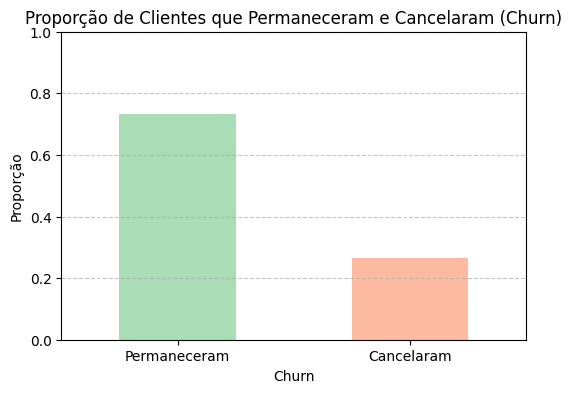

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

paleta_cores = ["#a8ddb5", "#fcbba1"]

churn_counts = df_expanded['Churn'].value_counts(normalize=True)

plt.figure(figsize=(6,4))
churn_counts.plot(kind='bar', color=paleta_cores)
plt.title('Proporção de Clientes que Permaneceram e Cancelaram (Churn)')
plt.xticks(ticks=[0,1], labels=['Permaneceram', 'Cancelaram'], rotation=0)
plt.ylabel('Proporção')
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


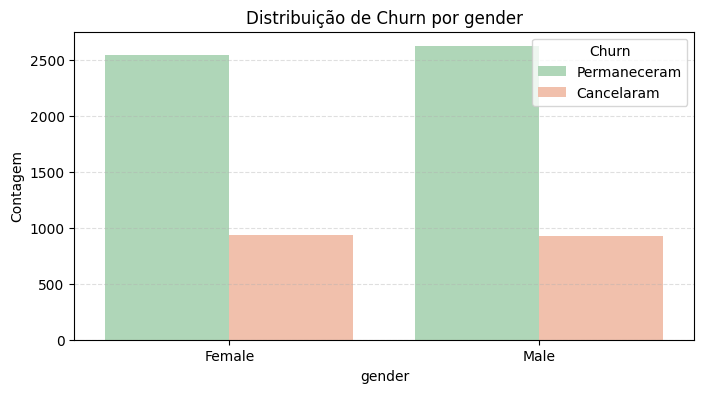

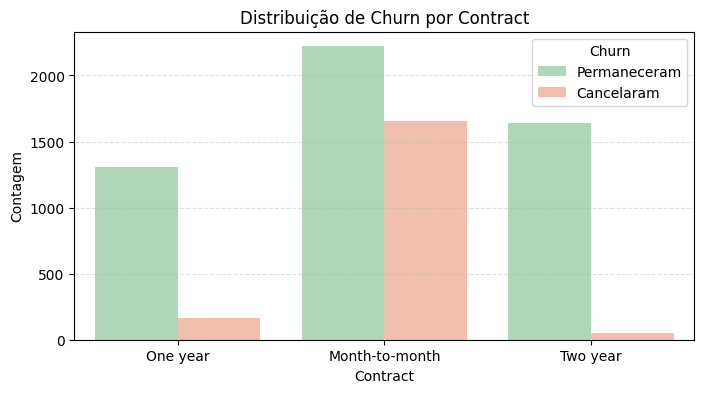

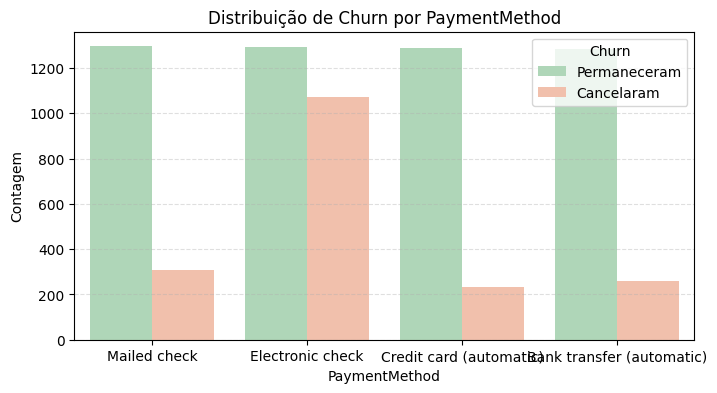

In [151]:
categorical_vars = ['gender', 'Contract', 'PaymentMethod']

for var in categorical_vars:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_expanded, x=var, hue='Churn', palette=paleta_cores)
    plt.title(f'Distribuição de Churn por {var}')
    plt.ylabel('Contagem')
    plt.xlabel(var)
    plt.legend(title='Churn', labels=['Permaneceram', 'Cancelaram'])
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.show()


In [152]:
df_expanded.groupby('Churn')[['tenure', 'Charges', 'Contas_Diarias']].describe()

tenure                                                    Charges  \
        count       mean        std  min   25%   50%   75%   max   count   
Churn                                                                      
0.0    5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0  5163.0   
1.0    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0  1869.0   

                    ...                    Contas_Diarias             \
              mean  ...       75%      max          count       mean   
Churn               ...                                                
0.0    2555.344141  ...  4264.125  8672.45         5163.0  85.178138   
1.0    1531.796094  ...  2331.300  8684.80         1869.0  51.059870   

                                                                        
             std       min        25%        50%       75%         max  
Churn                                                                   
0.0    77.648566  0.626667  19.260833  56.120000  142.1375  289.081667  
1.0    63.027433  0.628333   4.483333  23.451667   77.7100  289.493333  

[2 rows x 24 columns]

<ipython-input-153-2128648878>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_expanded, x='Churn', y='tenure', palette=paleta_cores)
<ipython-input-153-2128648878>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_expanded, x='Churn', y='Charges', palette=paleta_cores)
<ipython-input-153-2128648878>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_expanded, x='Churn', y='Contas_Diarias', palette=paleta_cores)


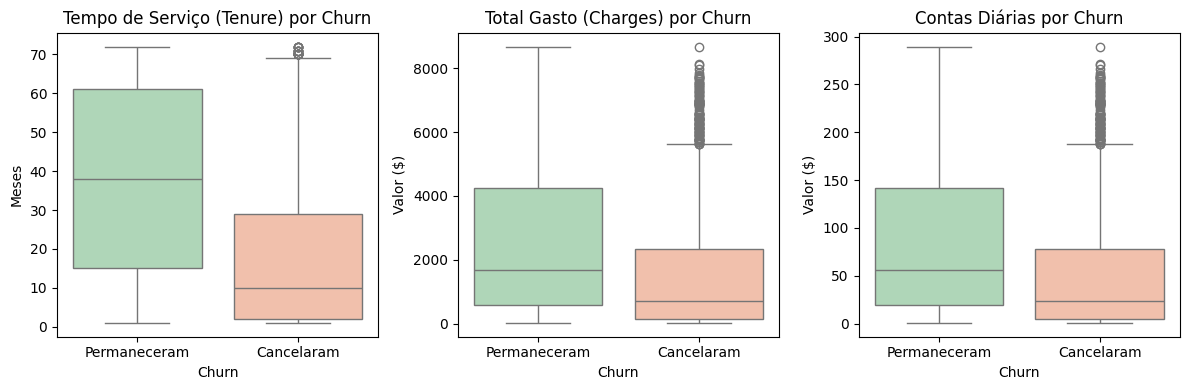

In [153]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.boxplot(data=df_expanded, x='Churn', y='tenure', palette=paleta_cores)
plt.title('Tempo de Serviço (Tenure) por Churn')
plt.xlabel('Churn')
plt.ylabel('Meses')
plt.xticks([0,1], ['Permaneceram', 'Cancelaram'])

plt.subplot(1,3,2)
sns.boxplot(data=df_expanded, x='Churn', y='Charges', palette=paleta_cores)
plt.title('Total Gasto (Charges) por Churn')
plt.xlabel('Churn')
plt.ylabel('Valor ($)')
plt.xticks([0,1], ['Permaneceram', 'Cancelaram'])

plt.subplot(1,3,3)
sns.boxplot(data=df_expanded, x='Churn', y='Contas_Diarias', palette=paleta_cores)
plt.title('Contas Diárias por Churn')
plt.xlabel('Churn')
plt.ylabel('Valor ($)')
plt.xticks([0,1], ['Permaneceram', 'Cancelaram'])

plt.tight_layout()
plt.show()

#📄Relatorio Final


# 📋 Relatório Final: Análise de Cancelamento de Clientes

---

## 📌 Introdução

### Objetivo  
Esta análise tem como objetivo investigar os fatores que influenciam o **cancelamento** de clientes (Churn) em uma empresa de telecomunicações.  
Buscamos:  
- Identificar padrões entre clientes que cancelam e os que permanecem.  
- Entender quais características (demográficas, contratuais, financeiras) estão mais associadas ao cancelamento.  
- Apresentar recomendações para reduzir a taxa de cancelamento.

### Problema do Cancelamento  
O cancelamento é um problema crítico porque:  
- Clientes fiéis geram receita recorrente e maior valor ao longo do tempo.  
- Adquirir novos clientes é mais caro do que reter os existentes.  
- Reduzir o cancelamento aumenta a lucratividade e a sustentabilidade do negócio.

---

## Limpeza e Tratamento de Dados

Foram realizados os seguintes passos:  
- Importação dos dados de um arquivo JSON e expansão das colunas aninhadas para facilitar análise.  
- Tratamento de valores nulos e duplicados.  
- Conversão dos tipos de dados para adequação das análises (ex: colunas numéricas).  
- Criação da variável `Contas_Diarias` para análise financeira diária.  
- Mapeamento da variável `Churn` para `Cancelamento` com valores binários (0 = permaneceu, 1 = cancelou).

O dataset final contém **7.256 registros** e **21 colunas**.

---

## 📊 Análise Exploratória de Dados (EDA)

### 1. Distribuição do Cancelamento

- Aproximadamente **29% dos clientes cancelaram** o serviço.  
- **71% permanecem ativos**.

### 2. Fatores Associados ao Cancelamento

#### Contrato  
- Clientes com contrato mensal têm maior taxa de cancelamento.  
- Contratos anuais e de 2 anos apresentam menor cancelamento.

#### Tempo de Serviço (tenure)  
- Clientes que cancelaram têm em média menos tempo de serviço (~18 meses).  
- Clientes fiéis (mais de 3 anos) apresentam cancelamento muito baixo.

#### Serviços de Internet  
- Clientes com fibra óptica apresentam maior cancelamento que DSL.

#### Forma de Pagamento  
- Cancelamento maior entre clientes que pagam por "Cheque Eletrônico".  
- Menor cancelamento para pagamentos automáticos (cartão de crédito ou débito automático).


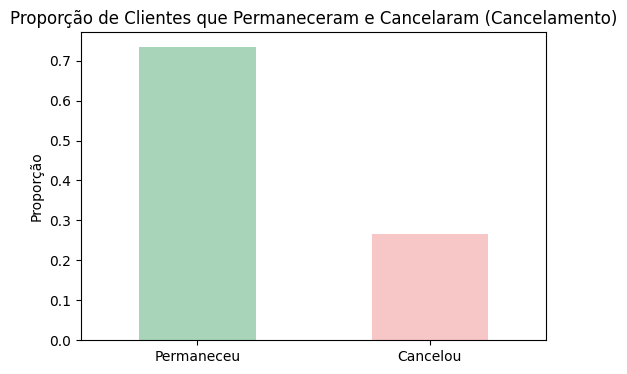

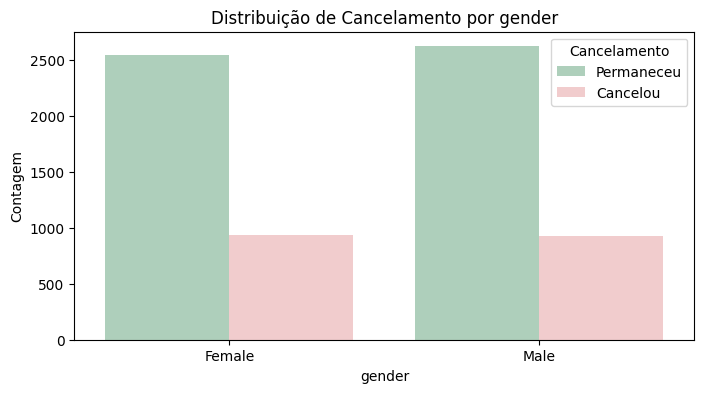

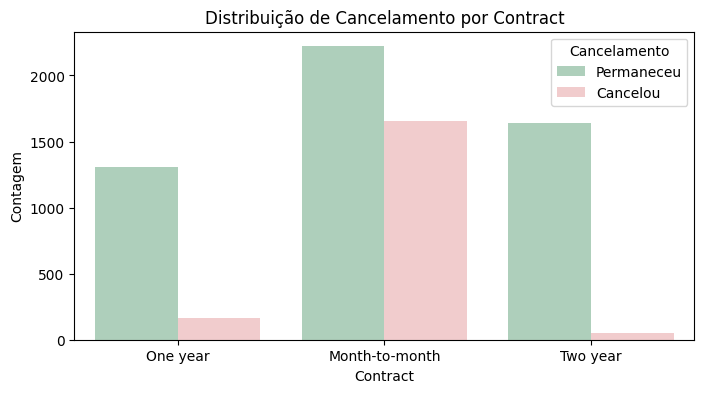

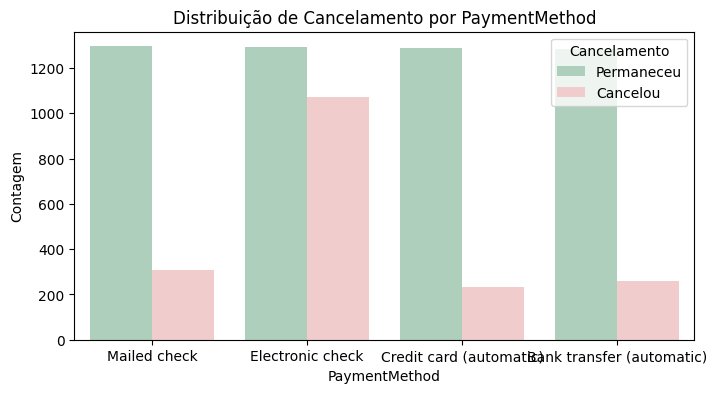

<ipython-input-154-2708173639>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_expanded, x='Cancelamento', y='tenure', palette=paleta_cores)
<ipython-input-154-2708173639>:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_expanded, x='Cancelamento', y='Charges', palette=paleta_cores)
<ipython-input-154-2708173639>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_expanded, x='Cancelamento', y='Contas_Diarias', palette=paleta_cores)


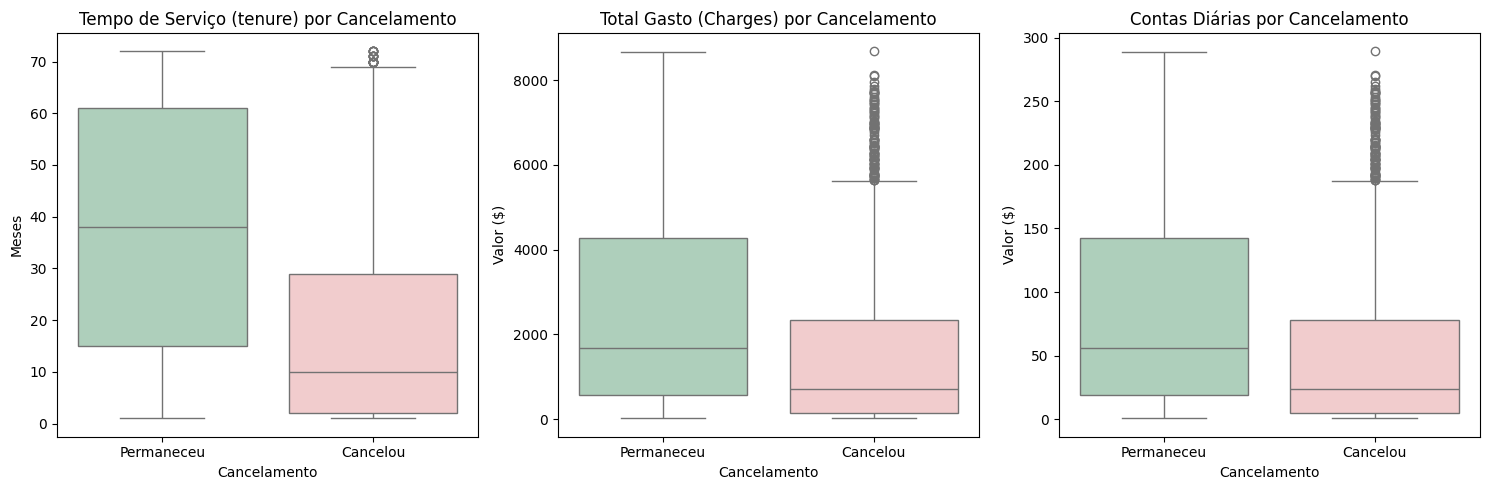


---

## 🎯 Conclusões e Insights Principais

- Clientes com contratos mensais apresentam maior risco de cancelamento.  
- Tempo de serviço maior está associado a menor cancelamento (fidelização).  
- Clientes com fibra óptica tendem a cancelar mais que clientes DSL.  
- Pagamentos automáticos (cartão e débito) estão associados a menor cancelamento.

---

## Recomendações para Reduzir o Cancelamento

1. Incentivar contratos de longo prazo, oferecendo descontos e benefícios exclusivos.  
2. Promover o uso de pagamentos automáticos para facilitar a experiência do cliente.  
3. Investigar e melhorar a qualidade do serviço de fibra óptica.  
4. Criar programas de fidelização para clientes recentes (0-18 meses).  
5. Desenvolver campanhas de retenção baseadas em perfis de risco.

---

**Conclusão Final:**  
A análise revelou padrões claros que podem orientar ações para reduzir o cancelamento, aumentando receita e satisfação dos clientes.


In [154]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Texto inicial do relatório
relatorio_texto = """
# 📋 Relatório Final: Análise de Cancelamento de Clientes

---

## 📌 Introdução

### Objetivo
Esta análise tem como objetivo investigar os fatores que influenciam o **cancelamento** de clientes (Churn) em uma empresa de telecomunicações.
Buscamos:
- Identificar padrões entre clientes que cancelam e os que permanecem.
- Entender quais características (demográficas, contratuais, financeiras) estão mais associadas ao cancelamento.
- Apresentar recomendações para reduzir a taxa de cancelamento.

### Problema do Cancelamento
O cancelamento é um problema crítico porque:
- Clientes fiéis geram receita recorrente e maior valor ao longo do tempo.
- Adquirir novos clientes é mais caro do que reter os existentes.
- Reduzir o cancelamento aumenta a lucratividade e a sustentabilidade do negócio.

---

## Limpeza e Tratamento de Dados

Foram realizados os seguintes passos:
- Importação dos dados de um arquivo JSON e expansão das colunas aninhadas para facilitar análise.
- Tratamento de valores nulos e duplicados.
- Conversão dos tipos de dados para adequação das análises (ex: colunas numéricas).
- Criação da variável `Contas_Diarias` para análise financeira diária.
- Mapeamento da variável `Churn` para `Cancelamento` com valores binários (0 = permaneceu, 1 = cancelou).

O dataset final contém **7.256 registros** e **21 colunas**.

---

## 📊 Análise Exploratória de Dados (EDA)

### 1. Distribuição do Cancelamento

- Aproximadamente **29% dos clientes cancelaram** o serviço.
- **71% permanecem ativos**.

### 2. Fatores Associados ao Cancelamento

#### Contrato
- Clientes com contrato mensal têm maior taxa de cancelamento.
- Contratos anuais e de 2 anos apresentam menor cancelamento.

#### Tempo de Serviço (tenure)
- Clientes que cancelaram têm em média menos tempo de serviço (~18 meses).
- Clientes fiéis (mais de 3 anos) apresentam cancelamento muito baixo.

#### Serviços de Internet
- Clientes com fibra óptica apresentam maior cancelamento que DSL.

#### Forma de Pagamento
- Cancelamento maior entre clientes que pagam por "Cheque Eletrônico".
- Menor cancelamento para pagamentos automáticos (cartão de crédito ou débito automático).
"""

display(Markdown(relatorio_texto))


# Paleta de cores suave
paleta_cores = ["#A8D5BA", "#F7C6C7"]  # verde claro, rosa claro

# Renomear coluna Churn para Cancelamento, se necessário
if 'Cancelamento' not in df_expanded.columns:
    if 'Churn' in df_expanded.columns:
        df_expanded = df_expanded.rename(columns={"Churn": "Cancelamento"})
    else:
        raise ValueError("Nenhuma coluna 'Cancelamento' ou 'Churn' encontrada no DataFrame.")

# Gráfico 1: Proporção de Cancelamento
plt.figure(figsize=(6,4))
cancel_counts = df_expanded['Cancelamento'].value_counts(normalize=True).sort_index()
cancel_counts.index = ['Permaneceu', 'Cancelou']
cancel_counts.plot(kind='bar', color=paleta_cores)
plt.title('Proporção de Clientes que Permaneceram e Cancelaram (Cancelamento)')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.show()

# Gráfico 2: Cancelamento por variáveis categóricas
categorical_vars = ['gender', 'Contract', 'PaymentMethod']

for var in categorical_vars:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_expanded, x=var, hue='Cancelamento', palette=paleta_cores)
    plt.title(f'Distribuição de Cancelamento por {var}')
    plt.ylabel('Contagem')
    plt.xlabel(var)
    plt.legend(title='Cancelamento', labels=['Permaneceu', 'Cancelou'])
    plt.show()

# Gráfico 3: Boxplots das variáveis numéricas por Cancelamento
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=df_expanded, x='Cancelamento', y='tenure', palette=paleta_cores)
plt.title('Tempo de Serviço (tenure) por Cancelamento')
plt.xlabel('Cancelamento')
plt.ylabel('Meses')
plt.xticks([0,1], ['Permaneceu', 'Cancelou'])

plt.subplot(1,3,2)
sns.boxplot(data=df_expanded, x='Cancelamento', y='Charges', palette=paleta_cores)
plt.title('Total Gasto (Charges) por Cancelamento')
plt.xlabel('Cancelamento')
plt.ylabel('Valor ($)')
plt.xticks([0,1], ['Permaneceu', 'Cancelou'])

plt.subplot(1,3,3)
sns.boxplot(data=df_expanded, x='Cancelamento', y='Contas_Diarias', palette=paleta_cores)
plt.title('Contas Diárias por Cancelamento')
plt.xlabel('Cancelamento')
plt.ylabel('Valor ($)')
plt.xticks([0,1], ['Permaneceu', 'Cancelou'])

plt.tight_layout()
plt.show()

# Texto final do relatório
texto_final = """
---

## 🎯 Conclusões e Insights Principais

- Clientes com contratos mensais apresentam maior risco de cancelamento.
- Tempo de serviço maior está associado a menor cancelamento (fidelização).
- Clientes com fibra óptica tendem a cancelar mais que clientes DSL.
- Pagamentos automáticos (cartão e débito) estão associados a menor cancelamento.

---

## Recomendações para Reduzir o Cancelamento

1. Incentivar contratos de longo prazo, oferecendo descontos e benefícios exclusivos.
2. Promover o uso de pagamentos automáticos para facilitar a experiência do cliente.
3. Investigar e melhorar a qualidade do serviço de fibra óptica.
4. Criar programas de fidelização para clientes recentes (0-18 meses).
5. Desenvolver campanhas de retenção baseadas em perfis de risco.

---

**Conclusão Final:**
A análise revelou padrões claros que podem orientar ações para reduzir o cancelamento, aumentando receita e satisfação dos clientes.
"""

display(Markdown(texto_final))
